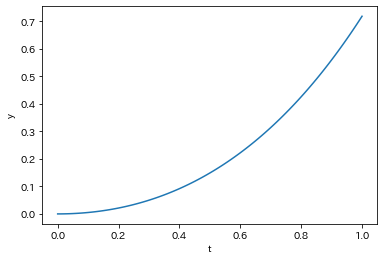

3.127507672279609e-10


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

N = 100
dt = 1/N
y_0 = 0


def func(t,y):
    return t+y


t = 0
y = y_0

t_list = [0]
y_list = [y_0]

for i in range(N):
    # オイラー法の場合
    """
    y += func(t,y)*dt
    t += dt
    """
    
    # 後退オイラー法の場合
    """
    t += dt
    y = (y+t*dt)/(1-dt)
    """
    
    # ホイン法の場合
    """
    y += ( func(t,y) + func(t+dt, y+dt*func(t,y)) )*dt/2
    t += dt
    """

    # ルンゲ・クッタ法の場合
    
    k1 = func(t,y)
    k2 = func(t+dt/2, y+k1*dt/2)
    k3 = func(t+dt/2, y+k2*dt/2)
    k4 = func(t+dt, y+k3*dt)
    y += (k1 + 2*k2 + 2*k3 + k4)*dt/6
    t += dt
    
    
    
    t_list.append(t)
    y_list.append(y)
    

plt.plot(t_list, y_list)
plt.xlabel('t')
plt.ylabel('y')
plt.show()


y_1_real = np.e-2
e_rel = np.abs(( y_list[-1] - y_1_real ) / y_1_real )
print(e_rel)

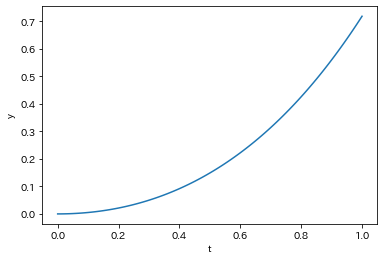

3.127512309274368e-10


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

N = 100
dt = 1/N
y_0 = 0


def func(t,y):
    return t+y


t = np.arange(0,1+dt,dt)

y = np.empty(N+1)
y[0] = y_0
 
for i in range(N):
    # オイラー法
    
    y[i+1] = y[i] + dt*func(t[i],y[i])
    
    
    # 後退オイラー法
    """
    y[i+1] = (y[i]+t[i+1]*dt)/(1-dt)
    """
    
    # ホイン法
    """
    y[i+1] = y[i] + ( func(t[i],y[i]) + func( t[i+1], y[i]+dt*func(t[i],y[i]) ) )*dt/2
    """

    # ルンゲ・クッタ法
    """
    k1 = func(t[i],y[i])
    k2 = func(t[i]+dt/2, y[i]+k1*dt/2)
    k3 = func(t[i]+dt/2, y[i]+k2*dt/2)
    k4 = func(t[i+1], y[i]+k3*dt)
    y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)*dt/6
    """


plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()


y_1_real = np.e-2
e_rel = np.abs(( y[-1] - y_1_real ) / y_1_real )
print(e_rel)